# Code

In [ ]:
!wget https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/scripts/compute_eval_statistics.py
!wget https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv
!wget https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe2.csv
!wget https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/metadata/ingredients_metadata.csv
!wget https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/dish_ids/dish_ids_cafe1.txt

--2024-03-17 02:10:37--  https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/scripts/compute_eval_statistics.py
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.251, 172.217.164.27, 172.217.7.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2276 (2.2K) [text/x-python]
Saving to: ‘compute_eval_statistics.py’

compute_eval_statis 100%[===================>]   2.22K  --.-KB/s    in 0s      

2024-03-17 02:10:37 (29.8 MB/s) - ‘compute_eval_statistics.py’ saved [2276/2276]

--2024-03-17 02:10:37--  https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.251, 172.217.164.27, 172.217.7.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.251|:443... connected.
HTTP request sent, awaiting response...

In [ ]:
with open('dish_ids_cafe1.txt') as file:
    dish_ids_cafe1 = file.readlines()
    dish_ids_cafe1 = [dish.strip() for dish in dish_ids_cafe1]
dish_ids_cafe1[:5]

['dish_1550704750',
 'dish_1550704903',
 'dish_1550705288',
 'dish_1550705370',
 'dish_1550705445']

data example



```
{
    dish_id
    calories
    mass
    fat
    carb
    protein
    [
        {
            ingr_id
            ingr_name
            mass
            calories
            fat
            carb
            protein
        },
        ...
    ]
}

```



In [ ]:
import json
from os import path
import statistics
import sys

DISH_ID_INDEX = 0
DATA_FIELDNAMES = ["dish_id", "calories", "mass", "fat", "carb", "protein"]


def ReadCsvData(filepath):
  if not path.exists(filepath):
    raise Exception("File %s not found" % path)
  parsed_data = {}
  with open(filepath, "r") as f_in:
    filelines = f_in.readlines()
    for line in filelines:
      data_values = line.strip().split(",")
      parsed_data[data_values[DISH_ID_INDEX]] = data_values
  return parsed_data

In [ ]:
dish_metadata_cafe1 = ReadCsvData("dish_metadata_cafe1.csv") # calories food
dish_metadata_cafe2 = ReadCsvData("dish_metadata_cafe2.csv") # no calories food

In [ ]:
dish_metadata_cafe2['dish_1572974428']

['dish_1572974428',
 '0.000000',
 '74.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 'ingr_0000000032',
 'tomatoes',
 '15.572240',
 '5.2945616',
 '0.10900568',
 '1.05891232',
 '0.10900568',
 'ingr_0000000042',
 'avocado',
 '23.358358',
 '37.3733728',
 '3.5037537',
 '2.10225222',
 '0.46716716',
 'ingr_0000000098',
 'multigrain bread',
 '13.732376',
 '39.233398232',
 '1.263378592',
 '6.72886424',
 '0.563027416',
 'ingr_0000000161',
 'olive oil',
 '3.893060',
 '34.4146504',
 '3.89306',
 '0.0',
 '0.0',
 'ingr_0000000281',
 'edamame',
 '15.572240',
 '18.9981328',
 '0.79418424',
 '1.52607952',
 '1.7129464',
 'ingr_0000000291',
 'salt',
 '0.045775',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 'ingr_0000000364',
 'sunflower seeds',
 '1.141160',
 '6.2307336',
 '0.57058',
 '0.171174',
 '0.2168204',
 'ingr_0000000531',
 'pumpkin seeds',
 '0.684788',
 '3.05415448',
 '0.13010972',
 '0.36978552',
 '0.13010972']

In [ ]:
def get_dish_by_id(id:str):
    return dish_metadata_cafe1[id]

In [ ]:
def extract_dish_data(dish:list):
    # Extract first 6th elements in 'dish'
    dish_id, calories, mass, fat, carb, protein = dish[:6]
    # Starting from the 7th element, group elements by 3 continuously
    ingrs = [dish[6:][i:i+7] for i in range(0, len(dish[6:]), 7)]
    # Reformat ingrs into an object format
    ingrs = [{
        'ingr_id': x[0],
        'ingr_name': x[1],
        'mass': x[2],
        'calories': x[3],
        'fat': x[4],
        'carb': x[5],
        'protein': x[6],
    } for x in ingrs]
    return {
        "dish_id": dish_id,
        "calories": calories,
        "mass": mass,
        "fat": fat,
        "carb": carb,
        "protein": protein,
        "ingrs": ingrs
    }

In [ ]:
extract_dish_data(dish_metadata_cafe1['dish_1550704750'])

{'dish_id': 'dish_1550704750',
 'calories': '136.949997',
 'mass': '83.000000',
 'fat': '2.988000',
 'carb': '0.000000',
 'protein': '25.730000',
 'ingrs': [{'ingr_id': 'ingr_0000000028',
   'ingr_name': 'chicken',
   'mass': '83.000000',
   'calories': '136.95',
   'fat': '2.988',
   'carb': '0.0',
   'protein': '25.73'}]}

In [ ]:
extract_dish_data(dish_metadata_cafe1['dish_1550705288'])

{'dish_id': 'dish_1550705288',
 'calories': '77.000000',
 'mass': '100.000000',
 'fat': '0.100000',
 'carb': '17.000000',
 'protein': '2.000000',
 'ingrs': [{'ingr_id': 'ingr_0000000005',
   'ingr_name': 'potatoes',
   'mass': '100.000000',
   'calories': '77.0',
   'fat': '0.1',
   'carb': '17.0',
   'protein': '2.0'}]}

In [ ]:
extract_dish_data(dish_metadata_cafe1['dish_1550705504'])

{'dish_id': 'dish_1550705504',
 'calories': '203.500000',
 'mass': '189.000000',
 'fat': '7.450000',
 'carb': '17.799999',
 'protein': '15.139999',
 'ingrs': [{'ingr_id': 'ingr_0000000005',
   'ingr_name': 'potatoes',
   'mass': '100.000000',
   'calories': '77.0',
   'fat': '0.1',
   'carb': '17.0',
   'protein': '2.0'},
  {'ingr_id': 'ingr_0000000025',
   'ingr_name': 'beef',
   'mass': '49.000000',
   'calories': '122.5',
   'fat': '7.35',
   'carb': '0.0',
   'protein': '12.74'},
  {'ingr_id': 'ingr_0000000031',
   'ingr_name': 'cucumbers',
   'mass': '40.000000',
   'calories': '4.0',
   'fat': '0.0',
   'carb': '0.8',
   'protein': '0.4'}]}

1 gam of ingr contain x gam of fat, y gam of carb, z gam of protein. Remember that x + y + z < 1

In [ ]:
len(dish_metadata_cafe1)

4768

In [ ]:
len(dish_ids_cafe1)

4768

4.1 Chế độ ăn uống ít chất béo

1.500 calo: Khoảng 50g chất béo/ngày;  
2.000 calo: Khoảng 67g chất béo/ngày;  
2.500 calo: Khoảng 83g chất béo/ngày.  


4.2 Chế độ ăn nhiều chất béo, low-carb hoặc chế độ ăn Ketogenic

1.500 calo: Khoảng 83 - 125g chất béo/ngày;  
2.000 calo: Khoảng 111 – 167g chất béo/ngày;  
2.500 calo: Khoảng 139 – 208g chất béo/ngày.

**Bổ sung protein mỗi ngày bao nhiêu là đủ?**



In [ ]:
class MealProgram:
    diet = "low" # @param ["low", "balanced", "abundant"]
    calo = "1500" # @param [1500, 2000, 2500]
    gender = "male" # @param ["male", "female"]
    age = 20 # @param {type:"number"}
    calo = int(calo)
    fat = { # unit (g)
        'low-1500': 50,
        'low-2000': 67,
        'low-2500': 83,
        'abundant-1500': [83, 125],
        'abundant-2000': [111, 167],
        'abundant-2500': [139,208]
    }.get(diet + "-" + str(calo))

    carb = { # unit (g)
        "male": 34,
        "female": 24
    }.get(gender)

    protein = { # unit (g)
        "male": 52,
        "female": 45
    }.get(gender)

In [ ]:
class ObjectiveConstraint:
    meal_program = MealProgram()
    error_rate = 0.1

constraint = ObjectiveConstraint()

In [ ]:
%%time
import random
from tqdm import tqdm

random.seed(42)

def calculate_total_calory(individual, factor:str="all"):
    assert factor in ['all', 'fat', 'carb', 'protein']
    index = {'all': 1, 'fat': 3, 'carb': 4, 'protein': 5}.get(factor)
    calories = [dish_metadata_cafe1[dish][index] for dish in individual]
    return sum(float(calo) for calo in calories)

def objective_function(individual, constraint:object=None):
    # Target is maximize objective_function
    # For each breach of constraints, minus 1 point
    # Return fitness in range (0,1]
    min_calo_a_day_target = constraint.meal_program.calo*(1-constraint.error_rate)
    max_calo_a_day_target = constraint.meal_program.calo*(1+constraint.error_rate)
    min_carb_a_day_target = constraint.meal_program.carb*(1-constraint.error_rate)
    max_carb_a_day_target = constraint.meal_program.carb*(1+constraint.error_rate)
    min_protein_a_day_target = constraint.meal_program.protein*(1-constraint.error_rate)
    max_protein_a_day_target = constraint.meal_program.protein*(1+constraint.error_rate)
    if type(constraint.meal_program.fat) is list:
        min_fat_a_day_target, max_fat_a_day_target = constraint.meal_program.fat
    else:
        min_fat_a_day_target = constraint.meal_program.fat*(1-constraint.error_rate)
        max_fat_a_day_target = constraint.meal_program.fat*(1+constraint.error_rate)

    # print(min_calo_a_day_target, max_calo_a_day_target)
    # print(min_carb_a_day_target, max_carb_a_day_target)
    # print(min_protein_a_day_target, max_protein_a_day_target)
    # print(min_fat_a_day_target, max_fat_a_day_target)

    ### Init fitness
    # 10 point for a day error and 10 for a whole week error
    max_fitness = 72
    fitness = max_fitness

    ### For a week
    if len(set(individual)) < 21:
        fitness -= 2

    ### For a day
    for day in range(7):
        dishes_a_day = individual[day*3:day*3+3]
        morning, lunch, afternoon = dishes_a_day
        # If it get duplicated, no point
        if len(set(dishes_a_day)) < 3:
            fitness -= 1
        # Calculate calo a day, must in range
        calo_a_day = calculate_total_calory(dishes_a_day)
        if not min_calo_a_day_target < calo_a_day < max_calo_a_day_target:
            fitness -= 3
        # The lunch contains the most calories
        if max(dishes_a_day) != lunch:
            fitness -= 1
        # Balance fat, carb, protein
        fat_a_day = calculate_total_calory(dishes_a_day, factor='fat')
        if not min_fat_a_day_target < fat_a_day < max_fat_a_day_target:
            fitness -= 2
        carb_a_day = calculate_total_calory(dishes_a_day, factor='carb')
        if not min_carb_a_day_target < carb_a_day < max_carb_a_day_target:
            fitness -= 2
        protein_a_day = calculate_total_calory(dishes_a_day, factor='protein')
        if not min_protein_a_day_target < protein_a_day < max_protein_a_day_target:
            fitness -= 2

    return max(fitness, 0) / max_fitness

def create_individual(chromosome_length):
    # Create a random individual (chromosome)
    return [dish_ids_cafe1[random.randint(0, len(dish_ids_cafe1) - 1)] for _ in range(chromosome_length)]

def create_population(population_size, chromosome_length):
    # Create a population of random individuals
    population = []
    for _ in range(population_size):
        population.append(create_individual(chromosome_length))
    return population

def selection(population, fitness_scores):
    # Selection function (e.g., Roulette Wheel Selection)
    # Select two parents based on their fitness scores
    # You can implement different selection methods here
    return random.choices(population, weights=fitness_scores, k=2)

def crossover(parent1, parent2, crossover_rate):
    # Crossover function (e.g., Single-point crossover)
    # With a probability (crossover_rate), swap genes between parents
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
    else:
        offspring1 = parent1
        offspring2 = parent2
    return offspring1, offspring2

def mutation(individual, mutation_rate):
    # Mutation function (e.g., Bit flip mutation)
    # With a probability (mutation_rate), flip a random gene
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = dish_ids_cafe1[random.randint(0, len(dish_ids_cafe1) - 1)]  # Flip gene value (e.g., 0 to 1 or vice versa)
    return individual

def genetic_algorithm(population_size, chromosome_length, generations, crossover_rate, mutation_rate):
    global constraint
    # Main GA loop
    population = create_population(population_size, chromosome_length)
    for idx, _ in tqdm(enumerate(range(generations)), desc=f"Generation:..."):
        # Evaluate fitness
        fitness_scores = [objective_function(individual, constraint) for individual in population]

        # Selection
        parents = selection(population, fitness_scores)

        # Crossover
        offspring1, offspring2 = crossover(parents[0], parents[1], crossover_rate)

        # Mutation
        offspring1 = mutation(offspring1.copy(), mutation_rate)  # Copy to avoid modifying parents
        offspring2 = mutation(offspring2.copy(), mutation_rate)

        # Create new population
        new_population = sorted(population, key=lambda individual: objective_function(individual, constraint), reverse=True)
        new_population = new_population[: population_size - 2] + [offspring1] + [offspring2]

        # Replace with next generation
        population = new_population

        # # Log best individual at index 0
        # print(objective_function(new_population[0], constraint), objective_function(new_population[-3], constraint))

    # Find best individual
    best_individual = population[0]
    best_fitness = fitness_scores[0]
    for i in range(1, len(population)):
        if fitness_scores[i] > best_fitness:
            best_individual = population[i]
            best_fitness = fitness_scores[i]

    return best_individual, best_fitness

# Example usage (replace objective function with your specific problem)
chromosome_length = 21
generations = 5000
population_size = 50
crossover_rate = 0.8
mutation_rate = 0.2

best_individual, best_fitness = genetic_algorithm(population_size, chromosome_length, generations, crossover_rate, mutation_rate)

print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

Generation:...: 5000it [01:30, 55.43it/s] 

Best Individual: ['dish_1559061752', 'dish_1563305982', 'dish_1562945186', 'dish_1559751552', 'dish_1561753021', 'dish_1559590157', 'dish_1550707056', 'dish_1562699699', 'dish_1551317589', 'dish_1560961012', 'dish_1550778694', 'dish_1560368570', 'dish_1562958809', 'dish_1568047973', 'dish_1550778856', 'dish_1551373253', 'dish_1565726887', 'dish_1562615153', 'dish_1560802048', 'dish_1558380058', 'dish_1562096973']
Best Fitness: 0.5833333333333334
CPU times: user 41 s, sys: 459 ms, total: 41.5 s
Wall time: 1min 30s




```
Generation:...: 50000it [15:20, 54.34it/s]Best Individual: ['dish_1551399402', 'dish_1562096401', 'dish_1563304925', 'dish_1562687246', 'dish_1565711115', 'dish_1558546663', 'dish_1551235171', 'dish_1561404485', 'dish_1550772551', 'dish_1550861458', 'dish_1562096907', 'dish_1561576916', 'dish_1562958809', 'dish_1568047973', 'dish_1558638292', 'dish_1551304155', 'dish_1563551360', 'dish_1551489961', 'dish_1551399151', 'dish_1567023335', 'dish_1562963033']
Best Fitness: 0.7195121951219512
CPU times: user 6min 35s, sys: 4.68 s, total: 6min 40s
Wall time: 15min 20s

```



statistic

In [ ]:
import pandas as pd
import time

# Define a function to run genetic algorithm for a given number of generations
def run_genetic_algorithm(generations):
    start_time = time.time()
    best_individual, best_fitness = genetic_algorithm(population_size, chromosome_length, generations, crossover_rate, mutation_rate)
    end_time = time.time()
    training_time = end_time - start_time
    return generations, training_time, best_fitness, best_individual

generation_step = "5000 (>30s)" # @param ["100", "500", "1000", "5000 (>30s)", "10000 (>1mn)", "50000 (~15mn)", "100k (~30mn)"]
generation_step = int(generation_step.split(" ")[0])
# List of generations to test
generations_list = [100, 500, 1000, 5000, 10000, 50000, 10**6]
generations_list = [step for step in generations_list if step <= generation_step]

# Run genetic algorithm for each number of generations and collect results
results = []
for generations in generations_list:
    result = run_genetic_algorithm(generations)
    results.append(result)

# Convert results to pandas DataFrame
df = pd.DataFrame(results, columns=['Generations', 'Training Time', 'Best Fitness', 'Best Individual'])
df

Generation:...: 100it [00:03, 25.84it/s]
Generation:...: 500it [00:14, 35.56it/s]
Generation:...: 1000it [00:21, 47.55it/s]
Generation:...: 5000it [01:39, 50.09it/s] 


,Generations,Training Time,Best Fitness,Best Individual
0,100,3.902461,0.439024,"[dish_1551491048, dish_1558722125, dish_156659..."
1,500,14.070692,0.487805,"[dish_1561739160, dish_1551236949, dish_156330..."
2,1000,21.264965,0.548780,"[dish_1563221157, dish_1558376212, dish_155149..."
3,5000,99.835112,0.634146,"[dish_1562094931, dish_1563391922, dish_155931..."


# Show result

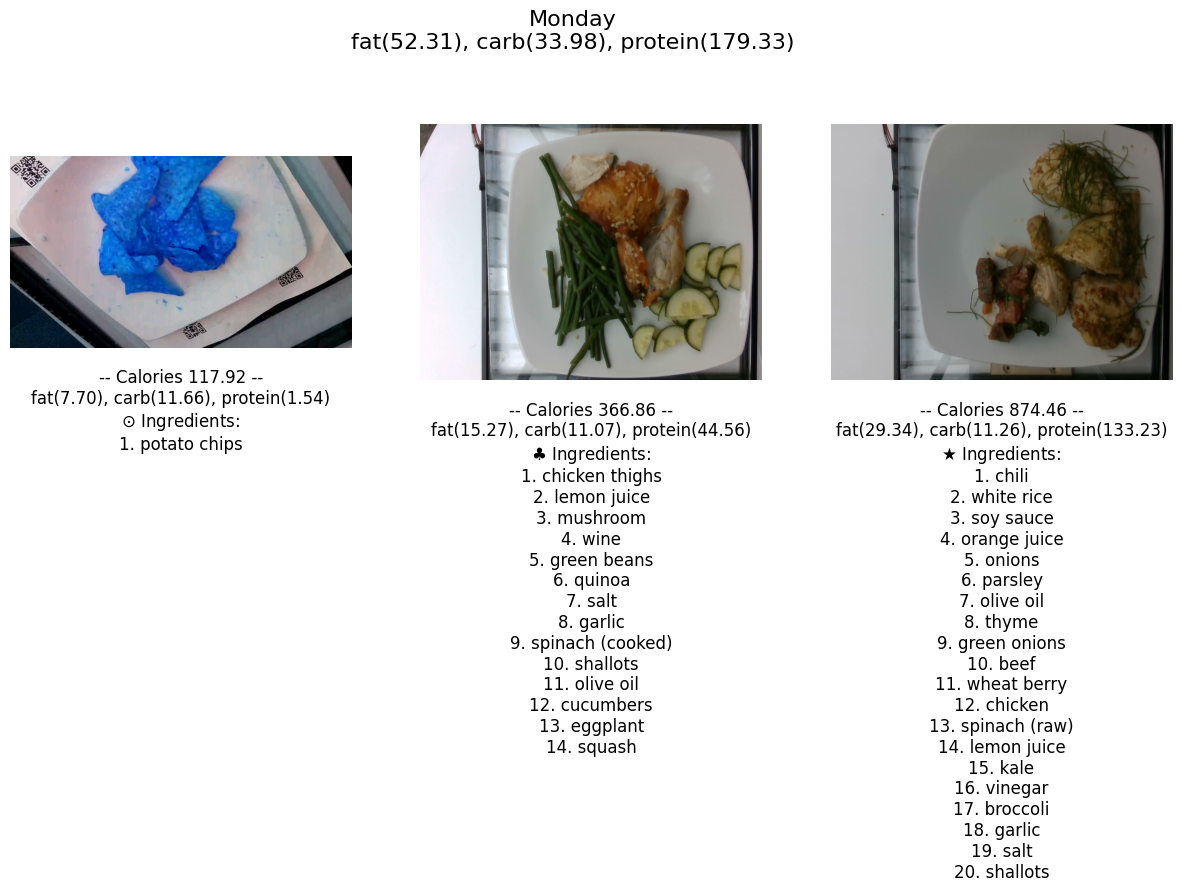

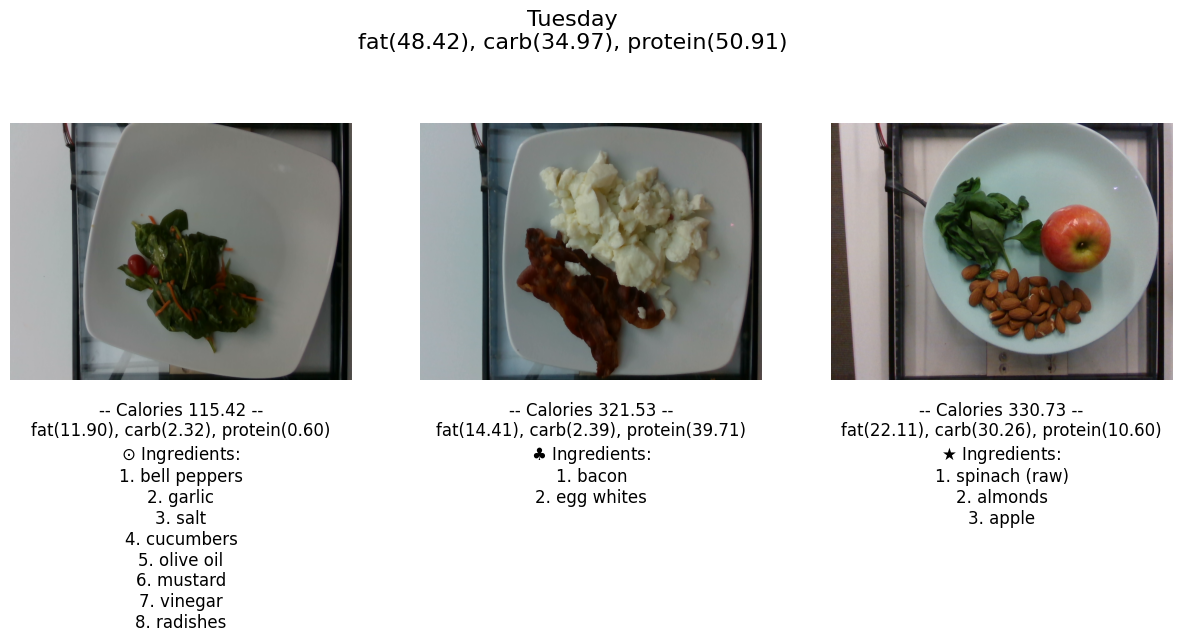

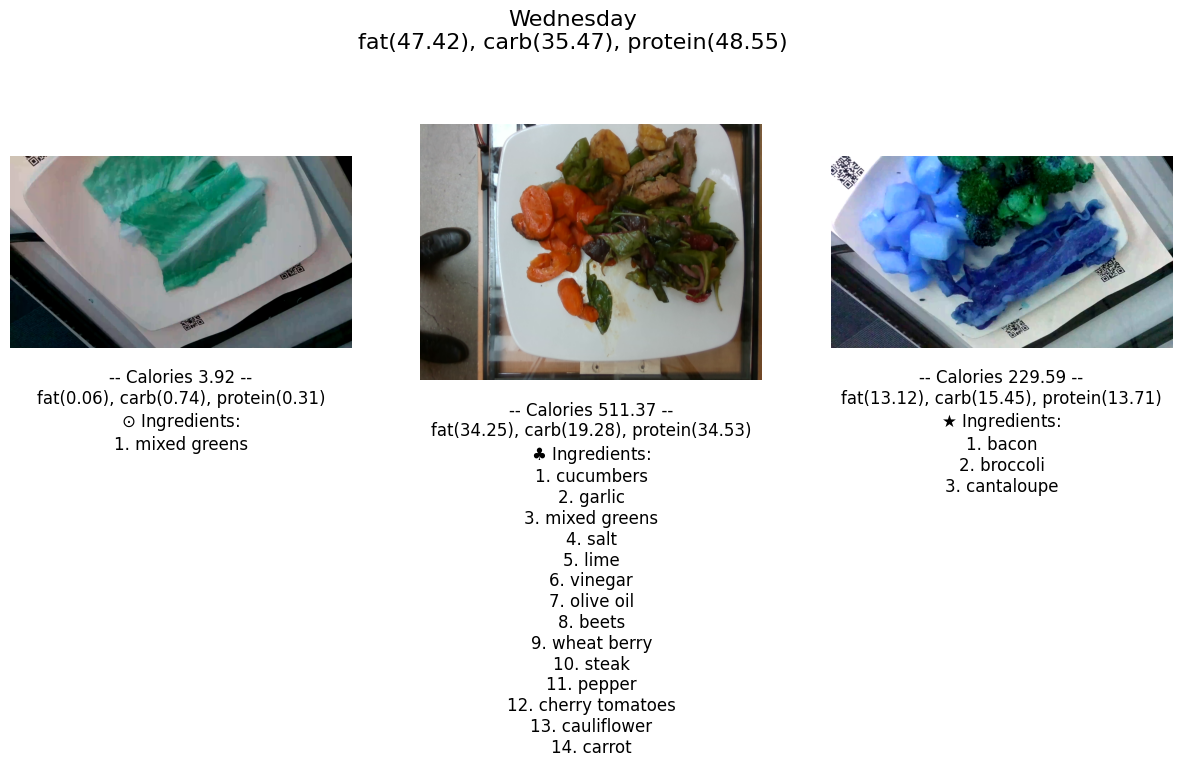

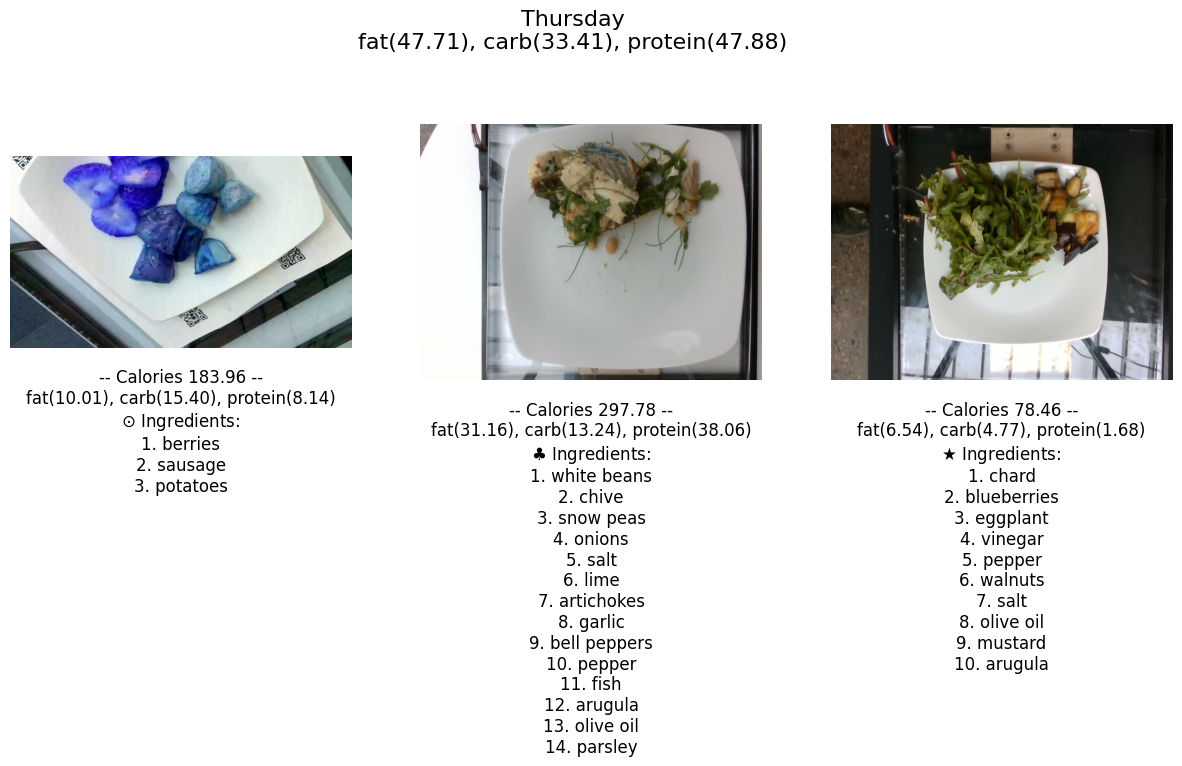

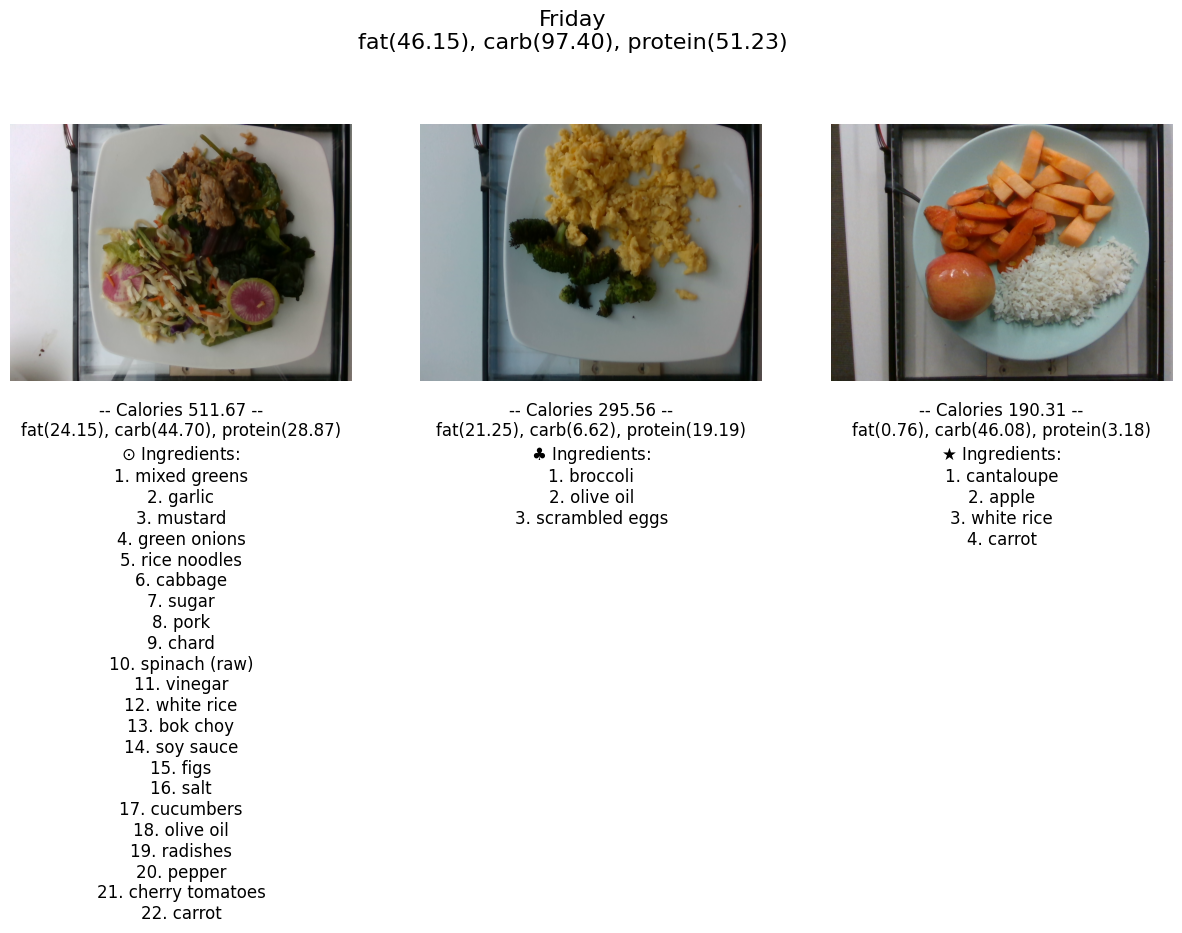

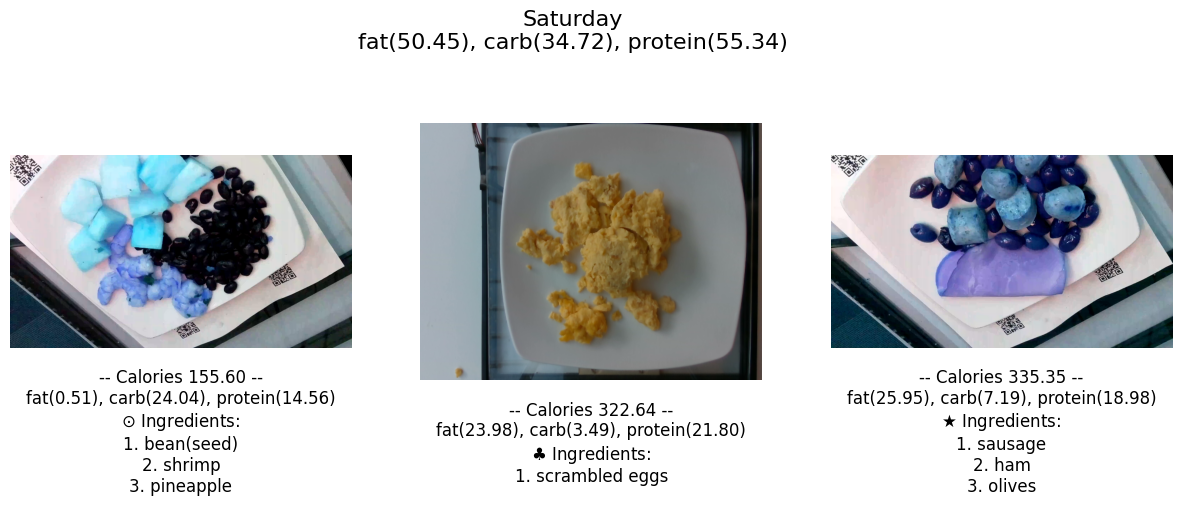

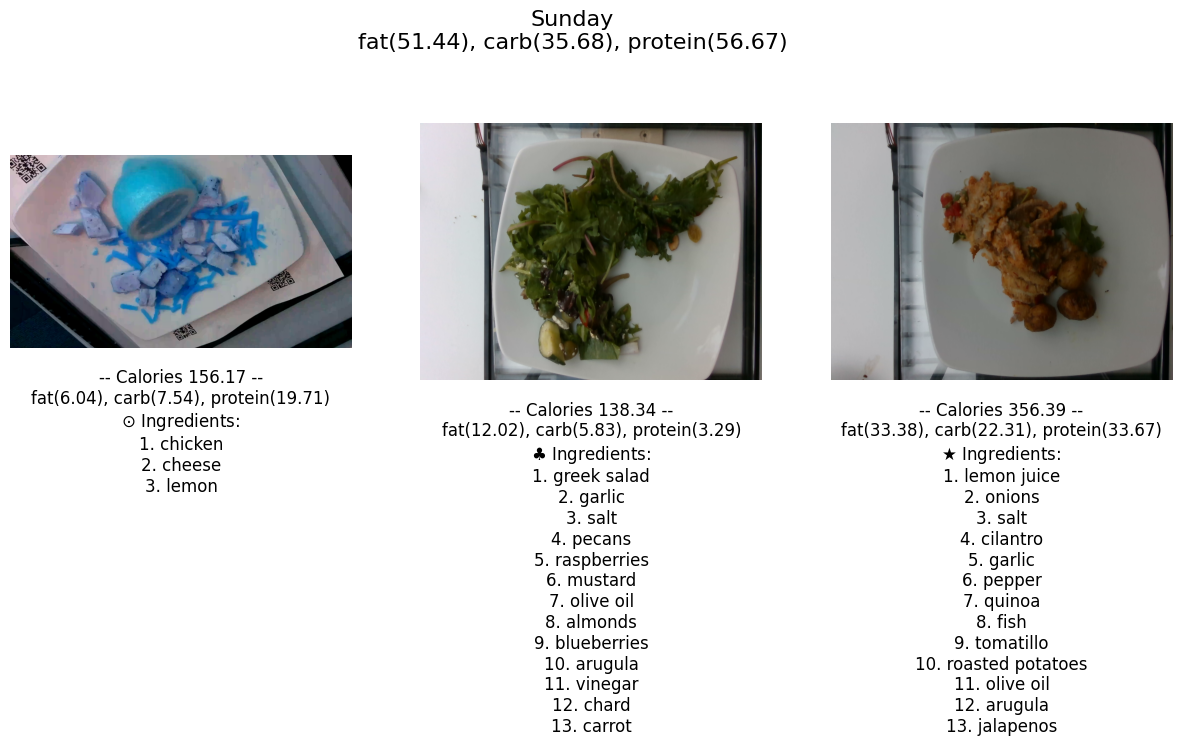

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from typing import List
import cv2

def request_video(video_url):
    # Open the video capture using the URL directly (avoid downloading)
    cap = cv2.VideoCapture(video_url)

    # Check if video capture opened successfully
    if not cap.isOpened():
        print("Error opening video stream or file")
        return None

    # Read the first frame
    ret, frame = cap.read()

    # Check if frame is read successfully
    return Image.fromarray(frame) if ret else None

def request_image(image_url):
    # Download image from URL
    response = requests.get(image_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Read image from the response content
        image = Image.open(BytesIO(response.content))
        return image

def render_nutritious_week(dishes: List[dict]):
    assert len(dishes) == 21, "The 'dishes' list must contain exactly 21 dishes."

    # Define icons for morning, lunch, and afternoon
    icons = [r"$\odot$", r"$\clubsuit$", r"$\bigstar$"]
    # icons = ["☀️","🍽️","🌅"]
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    for day in range(7):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        total_calo = {
            "fat": 0.0,
            "carb": 0.0,
            "protein": 0.0
        }

        for j in range(3):
            dish_index = day * 3 + j
            dish = dishes[dish_index]

            for factor in total_calo:
                total_calo[factor] += float(dish[factor])

            # Construct caption with icon and ingredients
            ingredients_html = "\n".join(f"{idx + 1}. " + ingr['ingr_name'] for idx, ingr in enumerate(dish['ingrs']))
            calories = '{:.2f}'.format(float(dish['calories']))
            caption = f"-- Calories {calories} --\n"
            caption += ", ".join(f"{factor}({'{:.2f}'.format(float(dish[factor]))})" for factor in total_calo) + '\n'
            caption += f"{icons[j]} Ingredients:\n{ingredients_html}"

            # Construct image URL and plot image with caption
            image_url = f"https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/{dish['dish_id']}/rgb.png"
            video_url = f"https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/imagery/side_angles/{dish['dish_id']}/camera_A.h264"

            img = request_image(image_url)
            if img is None:
                img = request_video(video_url)
                if img is None:
                    print(f"Fail to download dish image with id '{dish['dish_id']}'")
                    img = request_image("https://heeap.org/sites/default/files/pictures/hochimin-univ-technology.jpg")
            axes[j].imshow(img)
            axes[j].set_title(caption, y=0, pad=-15, verticalalignment="top", loc='center')
            axes[j].axis('off')

        day_title = f"{days_of_week[day]}\n"
        day_title += ", ".join(f"{factor}({'{:.2f}'.format(float(total_calo[factor]))})" for factor in total_calo)
        fig.suptitle(day_title, fontsize=16)
        plt.show()

# Result dishes
result_dishes = [get_dish_by_id(id) for id in best_individual]

# Call the function with your list of dishes
render_nutritious_week([extract_dish_data(dish) for dish in result_dishes])


# References

https://github.com/google-research-datasets/Nutrition5k?tab=readme-ov-file#download-data

https://www.vinmec.com/vi/tin-tuc/thong-tin-suc-khoe/dinh-duong/ban-nen-bao-nhieu-chat-beo-moi-ngay/

https://www.nhathuocankhang.com/ban-tin-suc-khoe/tinh-bot-la-gi-3-vai-tro-cua-tinh-bot-doi-voi-co-1455742

https://www.vinmec.com/vi/tin-tuc/thong-tin-suc-khoe/dinh-duong/bo-sung-protein-moi-ngay-bao-nhieu-la-du/#:~:text=Nh%E1%BB%AFng%20ng%C6%B0%E1%BB%9Di%20kh%E1%BB%8Fe%20m%E1%BA%A1nh%20c%E1%BA%A7n%20nh%E1%BA%ADn%20%C4%91%C6%B0%E1%BB%A3c%2010,n%E1%BB%AF%20v%C3%A0%20kho%E1%BA%A3ng%20100%20gram%20%E1%BB%9F%20nam%20gi%E1%BB%9Bi.

hiện tại khoan tính các món ko có calories

chưa phân chia các món nào ăn sáng, ăn trưa, ăn tối

chưa có metrics đánh giá, kiểm định đầu ra, objective chỉ là tạm thời